<a href="https://colab.research.google.com/github/Sung1523/lab4-retor4/blob/main/Intro_IA_y_C_V_02_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Computer Vision


##Library Import



In [ ]:
import cv2
import sys
import os
import numpy as np
from google.colab.patches import cv2_imshow #Google Colab only use
from matplotlib import pyplot as plt #for visualization purposes

In [ ]:
print(f"Numpy Version:{np.__version__} ")
print(f"Opencv Version: {cv2.__version__}")
print(f"Python Version: {sys.version}")


Numpy Version:1.21.5 
Opencv Version: 4.1.2
Python Version: 3.7.12 (default, Jan 15 2022, 18:48:18) 
[GCC 7.5.0]


##Matrix Operations

numpy for everything

Image black & white 2 x 2 pixels

In [ ]:
img_b_w =np.zeros((2,2))

In [ ]:
print(f"Image Black & White {img_b_w}") # width,height

Image Black & White [[0. 0.]
 [0. 0.]]


Image color 2 x 2 pixels

In [ ]:
img_color= np.zeros((3,2,2))# channels , witdh,height

In [ ]:
print(f"Image Black & White {img_color}")

Image Black & White [[[0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]]]


Normaly the numpy matix correspond to (height,width, channels)

In [ ]:
gray_image = np.full((250,250,3),225)

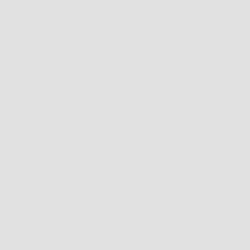

In [ ]:
cv2_imshow(gray_image)

there is a lot of operations that can be apply with numy
https://numpy.org/doc/stable/

Example: Copy

In [ ]:
another_gray_image = np.copy(gray_image)

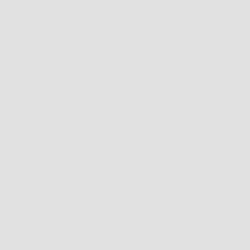

In [ ]:
cv2_imshow(another_gray_image)

##How Computer Vision Works


Let's take a picture

This code is design for Google Colab, doing the same in python is quiet simple

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

Run the "cell" below, after that you can use the "capture" botton to take a photo

Say "**Cheers**"

<IPython.core.display.Javascript object>

Saved to photo.jpg


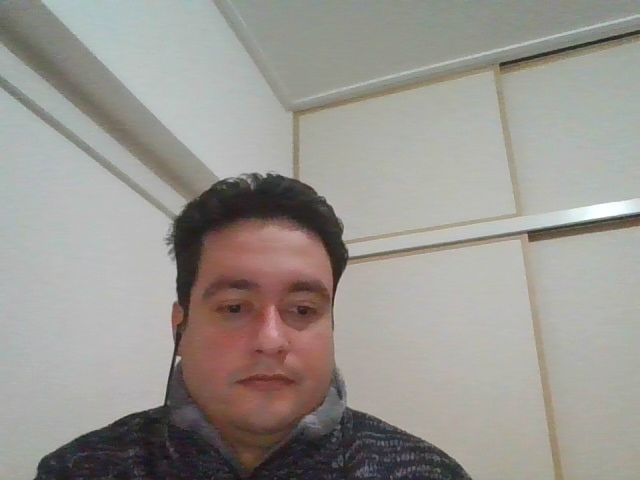

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

lets see what actually computer sees

In [ ]:
photo_array =cv2.imread("photo.jpg") ## opencv function
print (f"Photo Information {photo_array}")


Photo Information [[[122 127 106]
  [121 126 105]
  [118 124 105]
  ...
  [146 141 138]
  [150 144 139]
  [150 144 139]]

 [[122 126 107]
  [123 127 108]
  [122 128 109]
  ...
  [144 139 136]
  [145 141 136]
  [148 142 137]]

 [[118 124 107]
  [121 127 110]
  [125 131 114]
  ...
  [142 139 135]
  [144 140 135]
  [144 140 135]]

 ...

 [[148 161 159]
  [148 161 159]
  [148 161 159]
  ...
  [142 158 157]
  [142 158 157]
  [142 158 157]]

 [[146 161 157]
  [146 161 157]
  [147 161 157]
  ...
  [142 158 157]
  [142 158 157]
  [142 158 157]]

 [[145 160 156]
  [145 160 156]
  [147 161 157]
  ...
  [143 159 158]
  [143 159 158]
  [143 159 158]]]


In [ ]:
### IF YOU CAN NOT TAKE THE PICTURE PLEASE USE THIS CODE
photo_array =cv2.imread("messi5.jpg") ## opencv function
print (f"Photo Information {photo_array}")

Photo Information None


Lets see the shape

In [ ]:
print (f"photo matrix shape {photo_array.shape}")
red = photo_array[:100,:100,0]
green = photo_array[50:100,50:100,1]
blue = photo_array[:100,:100,2]
print(f"photo_red {red.shape}")
print(f"photo_green {green.shape}")

photo matrix shape (480, 640, 3)
photo_red (100, 100)
photo_green (50, 50)


##Computer Vision Task

Object Classification & Object Detection

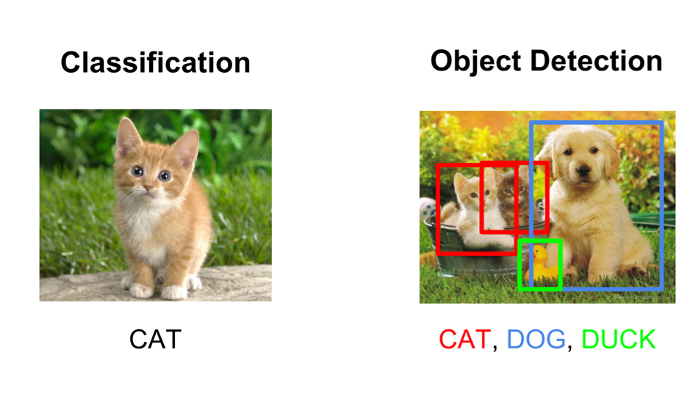

Object Recognition ( Face Recognition)

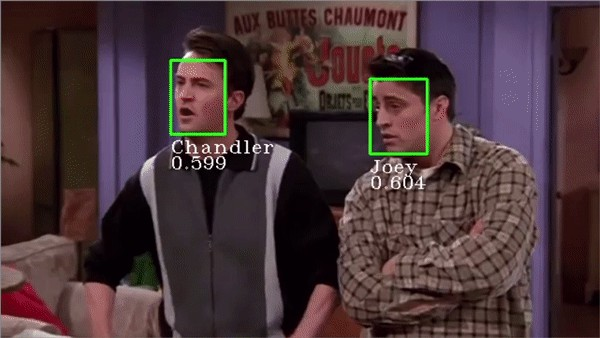

##Difference Between Google Colab & local environment



In Google colab some functions like access to Video Camera are complicated https://colab.research.google.com/drive/1hLuwoaMoyWgGsjCkm26VqO4-MtY0VPyk#scrollTo=amQiabQyRCIz&line=1&uniqifier=1


In [ ]:
## THIS CODE IS MADE FOR RUN IN LOCAL PYTHON ENVIROMENT
## PLEASE DONT RUN THIS CODE IN GOOGLE COLAB 
import numpy as np
import cv2

cap = cv2.VideoCapture(0)

while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()
    
    # Our operations on the frame come here
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Display the resulting frame
    cv2.imshow('frame',gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

#Why Opencv ?

Reasons

1.   Opensource
2.   Huge community (Good Documentation & Examples)
3.Multiple programming languages
4. Multiple platform supported (including android)




# Opencv Basic Operations

Reading an Image

In [ ]:
lena_picture = cv2.imread("messi5.jpg")

Display an Image

In [ ]:
#this code doesnt work on Google Colab
cv2.imshow("window_name",lena_picture)
cv2.waitKey(0)

for demostration use the special google colab command

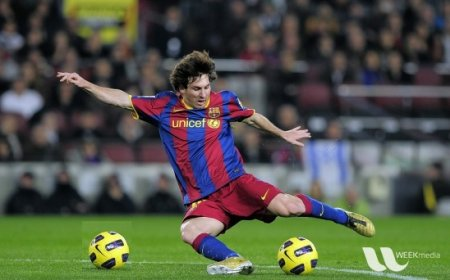

In [ ]:
cv2_imshow(lena_picture)

Read on grayscale directly

In [ ]:
gray_lena = cv2.imread("messi5.jpg",0)

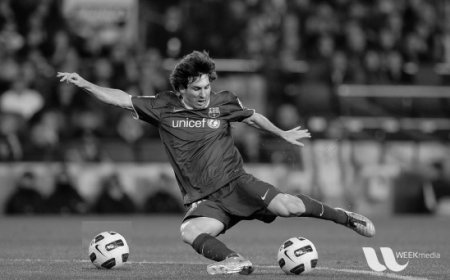

In [ ]:
cv2_imshow(gray_lena)

# Opencv Filters

###Bringhtness Example




In [ ]:
high_brightness_image = gray_lena+25
low_brightness_image = gray_lena-25

Higher brightness

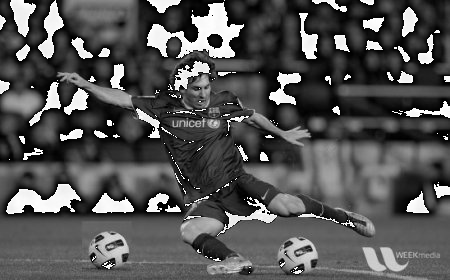

In [ ]:
cv2_imshow(low_brightness_image)

Lower Brightness

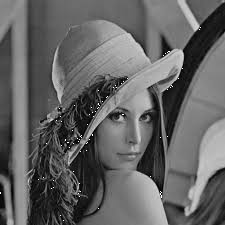

In [ ]:
cv2_imshow(low_brightness_image)

###Bluring

Blur, Median Blur, Gaussian Blur

In [ ]:
normal_blur = cv2.blur(lena_picture,(5,5))
median_blur = cv2.medianBlur(lena_picture,5)
gaussian_blur = cv2.GaussianBlur(lena_picture,(5,5),0)

Normal:

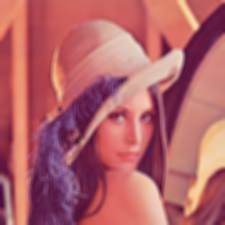

In [ ]:
cv2_imshow(normal_blur)

Median Blur

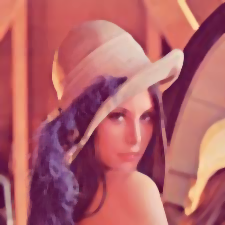

In [ ]:
cv2_imshow(median_blur)

Gaussian Blur

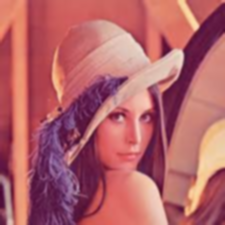

In [ ]:
cv2_imshow(gaussian_blur)

#Edge Detection

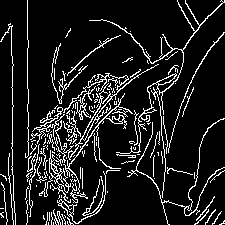

In [ ]:
my_image_variable=lena_picture
edge_images = cv2.Canny(my_image_variable,100,200)
cv2_imshow(edge_images)

Exercise one **Improve the edges** in the image using a **combination of Image filtering**

You can use next template for your excersise

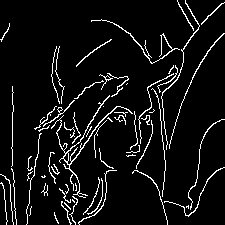

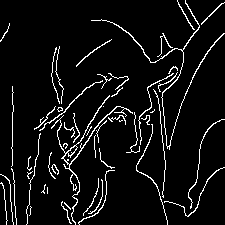

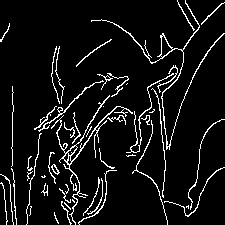

In [ ]:
### WRITE YOUR CODE HERE
my_copy = lena_picture
my_copy  =cv2.GaussianBlur(my_copy,(5,5),0)
my_copy2  =cv2.medianBlur(my_copy,3)
my_image_variable=my_copy
edge_images = cv2.Canny(my_image_variable,100,200)
edge_images_2 = cv2.Canny(my_copy2,100,200)
edge_combine = edge_images+edge_images_2
cv2_imshow(edge_images)
cv2_imshow(edge_images_2)
cv2_imshow(edge_combine)

# Color Detection

Lets speak about color

Before start with color we need to talk about contrast and bright.

as you may Imagine brightness is the intensity of the "pixels", but what is constrast?


Lets find out with example

In [ ]:
brightness_value =50 # DEFAULT VALUE 50
contrast_value = 50 # DEFAULT VALUE 50
input_image = lena_picture


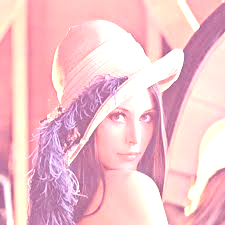

In [ ]:
    output_image = np.copy(input_image)
    vb = float(brightness_value /50) #RANGE 0-2
    vc = float(100) #RANGE 0-100
    cv2.convertScaleAbs(input_image, output_image, vb, vc)
    cv2_imshow(output_image)

After explanation you can try different values of bright and contrast

Color Detection

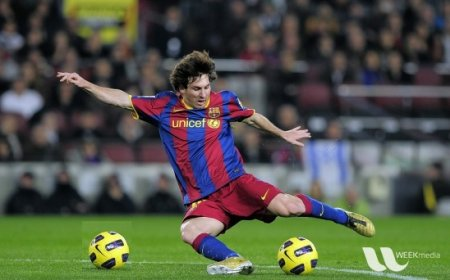

In [ ]:
soccer_image = cv2.imread("messi5.jpg")
cv2_imshow(soccer_image)



In [ ]:
### CHANGE THE VALUES RANGE (min,max)
## H RANGE (0 , 180)
## S RANGE (0 , 255)
## V RANGE (0 , 255)

#MIN RANGE
low_H = 75
low_S = 0
low_V = 0
# MAX RANGE
high_H = 130
high_S = 255
high_V = 200

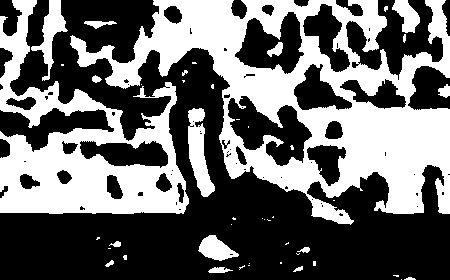

In [ ]:
image_HSV = cv2.cvtColor(soccer_image, cv2.COLOR_BGR2HSV)
image_threshold = cv2.inRange(image_HSV, (low_H, low_S, low_V), (high_H, high_S, high_V))
cv2_imshow(image_threshold)



# Image Histrograms


Gray Scale Histograms

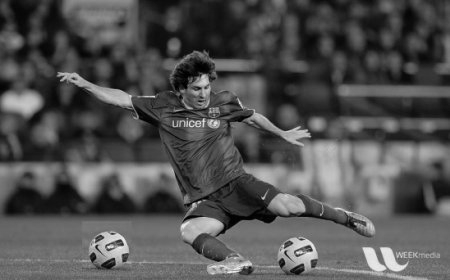

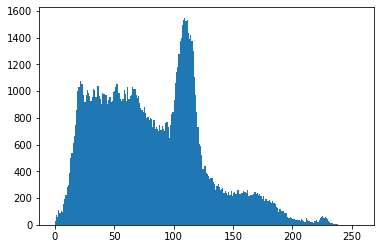

In [ ]:
gray_soccer = cv2.cvtColor(soccer_image,cv2.COLOR_RGB2GRAY)
cv2_imshow(gray_soccer)
plt.hist(gray_soccer.ravel(),256,[0,256])
plt.show()

Color Histograms

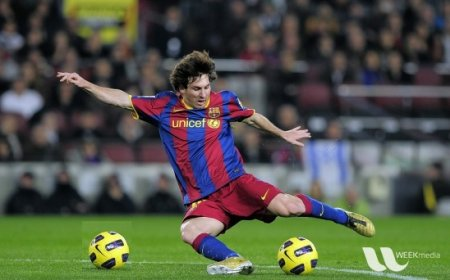

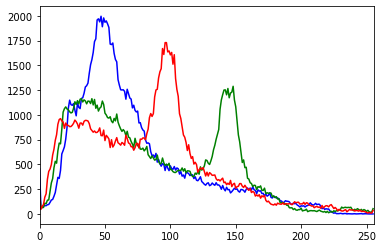

In [ ]:
cv2_imshow(soccer_image)
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([soccer_image],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()